# AAPL (APPLE STOCKS)

In [1]:
#!pip install regex
#!pip install pandas-ta
#!pip install yfinance


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
import matplotlib.pyplot as plt
import yfinance as yf
import statistics
import time
import datetime
import numpy as np

# Step 1: Get Historic Pricing Data

In [3]:
# Importing data from an API
# This data base is saved in a local driver in order to save time, it means not requiring
# download data from the web each time we run the code, however we can analize any other date.
df = yf.download('AAPL', start='2021-08-15', end='2022-08-15')
df.head(15)



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-16,148.539993,151.190002,146.470001,151.119995,150.277908,103296000
2021-08-17,150.229996,151.679993,149.089996,150.190002,149.353104,92229700
2021-08-18,149.800003,150.720001,146.149994,146.360001,145.544434,86326000
2021-08-19,145.029999,148.000000,144.500000,146.699997,145.882523,86960300
2021-08-20,147.440002,148.500000,146.779999,148.190002,147.364227,60549600
2021-08-23,148.309998,150.190002,147.889999,149.710007,148.875778,60131800
2021-08-24,149.449997,150.860001,149.149994,149.619995,148.786255,48606400
2021-08-25,149.809998,150.320007,147.800003,148.360001,147.533279,58991300
2021-08-26,148.350006,149.119995,147.509995,147.539993,146.717865,48597200


In [4]:
# Download file in csv
#aapl_df = df.to_csv("AAPL_data2.csv")
#aapl_df.head()

# Load local .csv file as DataFrame
df = pd.read_csv('Resources/AAPL_data.csv')
# Inspect the data
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2021-08-16  148.539993  151.190002  146.470001  151.119995  150.277908   
1    2021-08-17  150.229996  151.679993  149.089996  150.190002  149.353104   
2    2021-08-18  149.800003  150.720001  146.149994  146.360001  145.544449   
3    2021-08-19  145.029999  148.000000  144.500000  146.699997  145.882523   
4    2021-08-20  147.440002  148.500000  146.779999  148.190002  147.364227   
..          ...         ...         ...         ...         ...         ...   
246  2022-08-08  166.369995  167.809998  164.199997  164.869995  164.869995   
247  2022-08-09  164.020004  165.820007  163.250000  164.919998  164.919998   
248  2022-08-10  167.679993  169.339996  166.899994  169.240005  169.240005   
249  2022-08-11  170.059998  170.990005  168.190002  168.490005  168.490005   
250  2022-08-12  169.820007  172.169998  169.399994  172.100006  172.100006   

        Volume  
0    103296000  
1     92229700  


In [5]:
# Show some summary statistics
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   157.105179  159.129442  155.303426  157.320120  156.790447   
std     12.541994   12.584989   12.376535   12.481311   12.438479   
min    130.070007  132.389999  129.039993  130.059998  129.879593   
25%    147.459999  149.059998  146.259995  147.894997  147.277618   
50%    155.910004  158.229996  153.979996  156.770004  156.163788   
75%    168.150002  170.325005  166.020004  167.529999  167.052170   
max    182.630005  182.940002  179.119995  182.009995  181.259933   

             Volume  
count  2.510000e+02  
mean   8.852741e+07  
std    2.640506e+07  
min    4.100000e+07  
25%    6.953115e+07  
50%    8.328130e+07  
75%    1.011393e+08  
max    1.954327e+08  


In [6]:
len(df)

251

# Step 2: Prepare the data


In [7]:
# Keep only the 'Adj Close' Value
tsla_df = df[['Adj Close']]

In [8]:
# Re-inspect data
print(tsla_df)

      Adj Close
0    150.277908
1    149.353104
2    145.544449
3    145.882523
4    147.364227
..          ...
246  164.869995
247  164.919998
248  169.240005
249  168.490005
250  172.100006

[251 rows x 1 columns]


In [9]:
# Print Info
print(tsla_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  251 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB
None


Text(0, 0.5, 'Prices ($)')

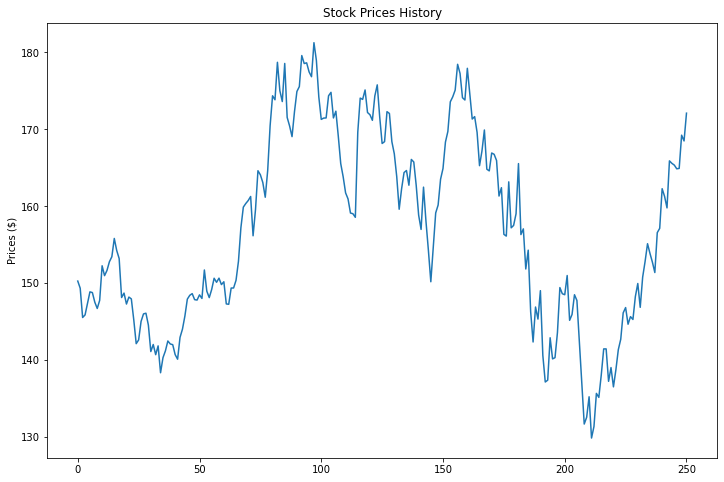

In [95]:
# Plotting the Adj Close columns
#df.plot(figsize=(12,6), color=['green', 'black', 'blue'], title='Tesla stock', fontsize=12, marker=".", ylabel='Prices ($)',xlabel = 'Date')
plt.figure(figsize=(12,8))
plt.title('Stock Prices History')
plt.plot(df['Adj Close'])
plt.ylabel('Prices ($)')

# Step 3: Adding Technical Indicators

In [11]:
import pandas_ta
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
tsla_df.ta.ema(close='Adj Close', length=10, append=True)

/Users/Fabiola/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas_ta/core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
246    161.342405
247    161.992877
248    163.310537
249    164.252258
250    165.679121
Name: EMA_10, Length: 251, dtype: float64

In [12]:
# Adding EMA_10 technical indicator
tsla_df.ta.ema(close='adj_close', length=10, append=True)

[X] Ooops!!! It's True, the series 'adj_close' was not found in Adj Close, EMA_10


,Adj Close,EMA_10
0,150.277908,NaN
1,149.353104,NaN
2,145.544449,NaN
3,145.882523,NaN
4,147.364227,NaN
...,...,...
246,164.869995,161.342405
247,164.919998,161.992877
248,169.240005,163.310537
249,168.490005,164.252258


In [13]:
#Drop the first n-rows = 9
tsla_df = tsla_df.iloc[9:]

In [14]:
len(tsla_df)

242

In [15]:
# Checking the data
tsla_df.head()

,Adj Close,EMA_10
9,147.771942,147.810733
10,152.266754,148.620919
11,150.983963,149.050563
12,151.660156,149.525035
13,152.793808,150.119357


In [16]:
# Selecting the Adj Close Column to plot and see data graphically
tsla_df1 = tsla_df[['Adj Close']]
tsla_df1.head()

,Adj Close
9,147.771942
10,152.266754
11,150.983963
12,151.660156
13,152.793808


<AxesSubplot:title={'center':'Tesla stock and EMA'}>

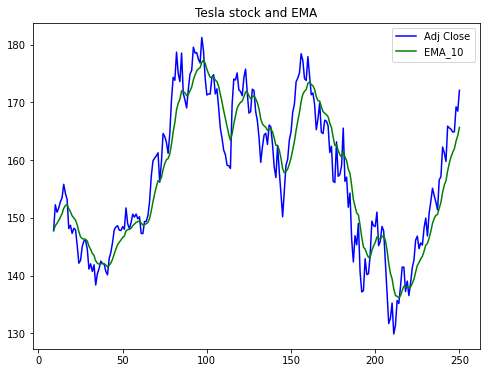

In [74]:
tsla_df.plot(figsize=(8,6), color=['Blue','Green'], title='Tesla stock and EMA', fontsize=10)

# Step 4: Test-Train Split

In [18]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(tsla_df[['Adj Close']], tsla_df[['EMA_10']], test_size=.30, random_state= 0)


In [19]:
# Tests set
print(X_test.describe())


        Adj Close
count   73.000000
mean   159.452763
std     12.914857
min    131.377502
25%    148.428253
50%    159.031921
75%    172.100006
max    179.586868


In [20]:
# Training set 80% data
print(X_train.describe())

        Adj Close
count  169.000000
mean   156.118433
std     12.279040
min    129.879593
25%    146.147003
50%    155.816879
75%    165.755875
max    181.259933


In [21]:
print(y_train.describe())

           EMA_10
count  169.000000
mean   155.827228
std     11.668843
min    136.174076
25%    146.283922
50%    154.168999
75%    165.718619
max    176.968896


In [22]:
print(y_test.describe())

           EMA_10
count   73.000000
mean   159.025977
std     11.361159
min    136.558344
25%    147.957862
50%    160.915506
75%    169.018588
max    177.330813


# Step 5: Training the Model

In [23]:
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()

# To measure the time it takes to run the model
start_time=time.time()

# Train the model
model.fit(X_train, y_train)


# End of the measuring time
#time.sleep(0)
print("---%s seconds to train---"%(time.time() - start_time))

start_time=time.time()

# Use model to make predictions
y_pred = model.predict(X_test)

# End of the measuring time
#time.sleep(0)
print("---%s seconds to predict---"%(time.time() - start_time))

---0.004922151565551758 seconds to train---
---0.002009153366088867 seconds to predict---


In [24]:
#y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
len(y_pred)

73

In [25]:
y_pred[:21]

array([[170.28632378],
       [172.0180233 ],
       [148.90752015],
       [171.56776083],
       [172.92086861],
       [172.23983187],
       [162.78537723],
       [176.15580001],
       [169.5236895 ],
       [148.301518  ],
       [147.50178518],
       [147.53773039],
       [164.06843442],
       [167.96247571],
       [141.61620363],
       [154.18079747],
       [141.4724228 ],
       [161.75353832],
       [151.03313411],
       [153.21152629],
       [156.03809926]])

In [26]:
# Converting y_pred array into a data frame: y_pred_df
y_pred_df = y_pred
y_pred_df = pd.DataFrame(y_pred_df, columns=['y_predict'])
y_pred_df.head()

,y_predict
0,170.286324
1,172.018023
2,148.907520
3,171.567761
4,172.920869


# Step 6: Validating the Fit

In [27]:
# Homework -To plot the confidence intervals
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Model Coefficients:", model.coef_)
print("Coefficient of Determination R2:", r2_score(y_test, y_pred))

print("Mean squarred_error:", mean_squared_error(y_test, y_pred))


Mean Absolute Error: 3.6428416109101156
Model Coefficients: [[0.89981098]]
Coefficient of Determination R2: 0.8565606823852576
Mean squarred_error: 18.260938496195195


**MAE:** Mean of the absolute errors.-  Is the arithmetic mean of our model, it is calculated by summing the absolute difference between observed values of X and Y and dividing by the total number of observations.

**Coefficient of Determination:** It tells how well the data fits the model (the goodness of fit).

**Model Coefficients:** The output of the linear regression model.

MAE. the lower the better.
Coefficient Of determination: The closer to 1 the better.

### End

## Defining the data base to be used in Postgress
### This data base was created just to visualize real Stock values vs Predicted values for one year.

In [28]:
# Defining the data set to be converted to a csv file to be used in Postgress
index = df[['Date']]
index
#tsla_df = tsla_df.iloc[9:]
index = index.iloc[9:]
index

,Date
9,2021-08-27
10,2021-08-30
11,2021-08-31
12,2021-09-01
13,2021-09-02
...,...
246,2022-08-08
247,2022-08-09
248,2022-08-10
249,2022-08-11


In [29]:
# 1. Checking the data
tsla_df.head()


,Adj Close,EMA_10
9,147.771942,147.810733
10,152.266754,148.620919
11,150.983963,149.050563
12,151.660156,149.525035
13,152.793808,150.119357


In [30]:
# 2. Selecting the Adj Close column
adjClose = tsla_df[['Adj Close']]
adjClose.head()


,Adj Close
9,147.771942
10,152.266754
11,150.983963
12,151.660156
13,152.793808


In [31]:
# 3. Selecting the Technical indicator EMA_10
ema = tsla_df[['EMA_10']]
ema.head()

,EMA_10
9,147.810733
10,148.620919
11,149.050563
12,149.525035
13,150.119357


In [32]:
# 4. Fiting the model for all the values
model.fit(adjClose, ema)

LinearRegression()

In [33]:
## 5. Predicting values
y_pred2 = model.predict(adjClose)

In [34]:
len(y_pred2)

242

In [35]:
# Converting y_pred2 array into a data frame: y_pred_df
y_pred_csv = y_pred2
y_pred_csv = pd.DataFrame(y_pred2, columns=['Linear_Regression_prediction'], index = index['Date'])
y_pred_csv

,Linear_Regression_prediction
Date,
2021-08-27,148.609806
2021-08-30,152.542320
2021-08-31,151.420005
2021-09-01,152.011607
2021-09-02,153.003440
...,...
2022-08-08,163.568903
2022-08-09,163.612651
2022-08-10,167.392228


In [36]:
# Creating the csv file
y_pred = y_pred_csv.to_csv('LinearRegression1.csv')


# End

## Comparision from real values Versus predicted values from 1 year

In [37]:
# Showing the Predicted values data frame
y_pred_csv.head()

y_pred_csv.reset_index(level=0, inplace=True)

y_pred_csv.head() ,len(y_pred_csv)

(         Date  Linear_Regression_prediction
 0  2021-08-27                    148.609806
 1  2021-08-30                    152.542320
 2  2021-08-31                    151.420005
 3  2021-09-01                    152.011607
 4  2021-09-02                    153.003440,
 242)

In [61]:
# Selecting the Adj Close column form the original data base downloaded fron Yahoo Finance
tsla_df2 = tsla_df[['Adj Close']]
tsla_df2.head()
len(y_pred_csv)

,Adj Close
9,147.771942
10,152.266754
11,150.983963
12,151.660156
13,152.793808


In [62]:
# Merging the data set oorinal (downloaded) and the predicted values to compare in a graph
real_vs_pred = pd.merge(y_pred_csv,tsla_df2, 
                  left_index=True, 
                  right_index=True)

real_vs_pred.head()

,Date,Linear_Regression_prediction,Adj Close
9,2021-09-10,148.931740,147.771942
10,2021-09-13,149.436340,152.266754
11,2021-09-14,148.192194,150.983963
12,2021-09-15,148.983925,151.660156
13,2021-09-16,148.775118,152.793808


<AxesSubplot:title={'center':'Tesla Real stock Vs Linear Regression Prediction'}>

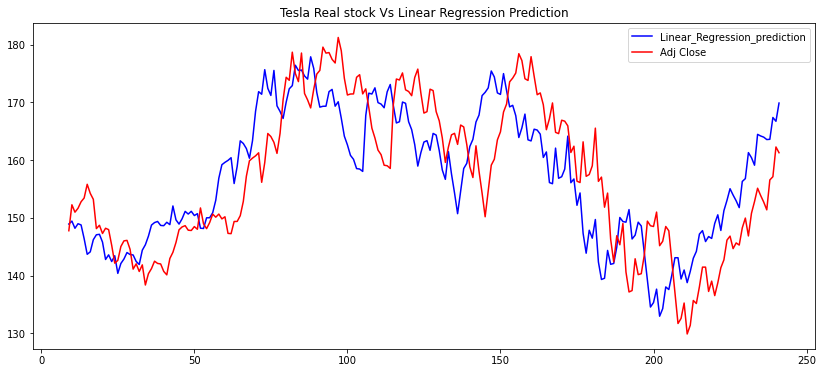

In [89]:
real_vs_pred.plot(figsize=(14,6), color=['Blue','Red'], title='Tesla Real stock Vs Linear Regression Prediction', fontsize=10)


# End